In [1]:
import pandas as pd
df = pd.read_csv('train.csv')

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [4]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [5]:
dtypes = df.dtypes
dtypes

Survived      int64
Pclass        int64
Sex             str
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin           str
Embarked        str
dtype: object

In [6]:
n_unique = df.nunique()
n_unique

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [7]:
pd.DataFrame({
    'dtypes': dtypes, "num_unique": n_unique})

,dtypes,num_unique
Survived,int64,2
Pclass,int64,3
Sex,str,2
Age,float64,88
SibSp,int64,7
Parch,int64,7
Fare,float64,248
Cabin,str,147
Embarked,str,3


In [8]:
def chk_types(df):
    dtypes = df.dtypes
    n_unique = df.nunique()
    return pd.DataFrame({
        'dtypes': dtypes, "num_unique": n_unique})

In [9]:
chk_types(df)

,dtypes,num_unique
Survived,int64,2
Pclass,int64,3
Sex,str,2
Age,float64,88
SibSp,int64,7
Parch,int64,7
Fare,float64,248
Cabin,str,147
Embarked,str,3


In [10]:
from preprocessing.chk_t import chk_types
chk_types(df)

,dtypes,num_unique
Survived,int64,2
Pclass,int64,3
Sex,str,2
Age,float64,88
SibSp,int64,7
Parch,int64,7
Fare,float64,248
Cabin,str,147
Embarked,str,3


In [11]:
from preprocessing.chk_t import chk_types
chk_types(df)

,dtypes,num_unique
Survived,int64,2
Pclass,int64,3
Sex,str,2
Age,float64,88
SibSp,int64,7
Parch,int64,7
Fare,float64,248
Cabin,str,147
Embarked,str,3


In [12]:
cols = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
df[cols] = df[cols].astype('category')

In [13]:
def handle_types(cols):
    df[cols] = df[cols].astype('category')
    chk_types(df)

In [14]:
handle_types(cols)
chk_types(df)

,dtypes,num_unique
Survived,category,2
Pclass,category,3
Sex,category,2
Age,float64,88
SibSp,category,7
Parch,category,7
Fare,float64,248
Cabin,str,147
Embarked,category,3


In [15]:
df.shape

(891, 9)

In [16]:
null = df.isnull().sum()
null

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [17]:
ratio_null = null / df.shape[0]
pd.DataFrame({
    'num_null': null,
    'ratio_null': ratio_null
})

,num_null,ratio_null
Survived,0,0.000000
Pclass,0,0.000000
Sex,0,0.000000
Age,177,0.198653
SibSp,0,0.000000
Parch,0,0.000000
Fare,0,0.000000
Cabin,687,0.771044
Embarked,2,0.002245


In [18]:
df = df.dropna(subset=['Embarked'])

In [19]:
df = df.drop('Cabin', axis=1)

In [20]:
median = df['Age'].median()
df['Age'] = df['Age'].fillna(median)

In [21]:
null = df.isnull().sum()
ratio_null = null / df.shape[0]
pd.DataFrame({
    'num_null': null,
    'ratio_null': ratio_null
})

,num_null,ratio_null
Survived,0,0.0
Pclass,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Fare,0,0.0
Embarked,0,0.0


In [22]:
pip install matplotlib 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import matplotlib.pyplot as plt

In [24]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import seaborn as sns

In [26]:
df.dtypes

Survived    category
Pclass      category
Sex         category
Age          float64
SibSp       category
Parch       category
Fare         float64
Embarked    category
dtype: object

In [27]:
non_cols = ['Age', 'Fare']

In [28]:
num_cols = df.select_dtypes('number').columns
num_cols 

Index(['Age', 'Fare'], dtype='str')

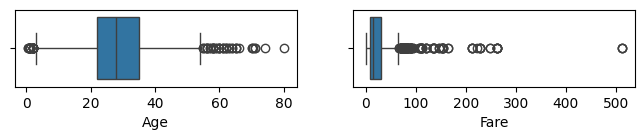

In [29]:
plt.figure(figsize=(8, 1))
for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i+1)
    sns.boxplot(df[col], orient='h') 

In [30]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    lower_outliers = df[df[col] < lower_bound][col].values
    upper_outliers = df[df[col] > upper_bound][col].values
    print(f"{col}: Lower Bound = {lower_bound}, Upper Bound = {upper_bound}")
    print(f"  Lower Outliers: {lower_outliers}")
    print(f"  Upper Outliers: {upper_outliers}")

    df[col].replace(lower_outliers, lower_bound, inplace=True)
    df[col].replace(upper_outliers, upper_bound, inplace=True)

Age: Lower Bound = 2.5, Upper Bound = 54.5
  Lower Outliers: [2.   2.   0.83 2.   1.   1.   1.   2.   2.   0.92 2.   1.   1.   0.75
 2.   2.   2.   0.75 0.67 1.   0.42 2.   1.   0.83]
  Upper Outliers: [58.  55.  66.  65.  59.  71.  70.5 55.5 61.  56.  58.  59.  62.  58.
 63.  65.  61.  60.  64.  65.  56.  63.  58.  55.  71.  64.  62.  62.
 60.  61.  57.  80.  56.  58.  70.  60.  60.  70.  57.  74.  56. ]
Fare: Lower Bound = -26.7605, Upper Bound = 65.6563
  Lower Outliers: []
  Upper Outliers: [ 71.2833 263.     146.5208  82.1708  76.7292  83.475   73.5    263.
  77.2875 247.5208  73.5     77.2875  79.2     66.6     69.55    69.55
 146.5208  69.55   113.275   76.2917  90.      83.475   90.      79.2
  86.5    512.3292  79.65   153.4625 135.6333  77.9583  78.85    91.0792
 151.55   247.5208 151.55   110.8833 108.9     83.1583 262.375  164.8667
 134.5     69.55   135.6333 153.4625 133.65    66.6    134.5    263.
  75.25    69.3    135.6333  82.1708 211.5    227.525   73.5    120.
 113.2

C:\Users\NOUR SOFT\AppData\Local\Temp\ipykernel_15580\520062607.py:13: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df[col].replace(lower_outliers, lower_bound, inplace=True)
C:\Users\NOUR SOFT\AppData\Local\Temp\ipykernel_15580\520062607.py:14: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through 

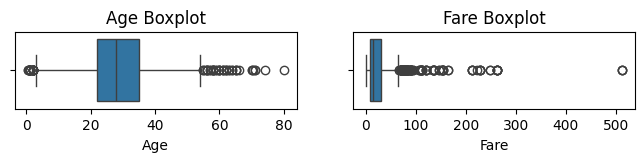

In [31]:
num_cols = df.select_dtypes('number').columns
plt.figure(figsize=(8, 1))
for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i+1)
    sns.boxplot(df[col], orient='h')
    plt.title(f"{col} Boxplot")
plt.show()

In [32]:
df.drop_duplicates(inplace=True)

In [33]:
df.duplicated().sum()

np.int64(0)

## virtualization


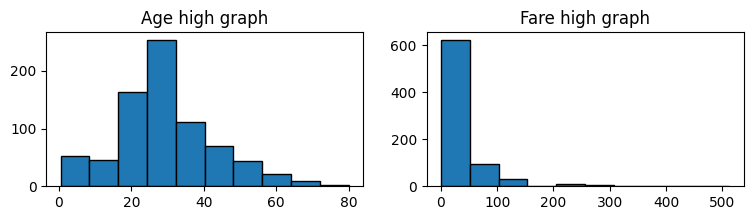

In [35]:
plt.figure(figsize=(9, 2))
for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i+1)
    plt.hist(df[col], edgecolor='black')
    plt.title(f"{col} high graph")
plt.show()    

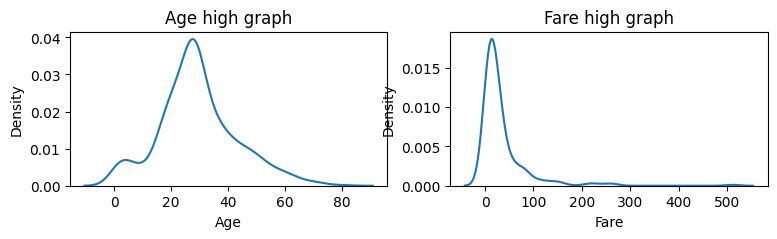

In [39]:
plt.figure(figsize=(9, 2))
for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i+1)
    sns.kdeplot(df[col])
    plt.title(f"{col} high graph")
plt.show()    

<function matplotlib.pyplot.show(close=None, block=None)>

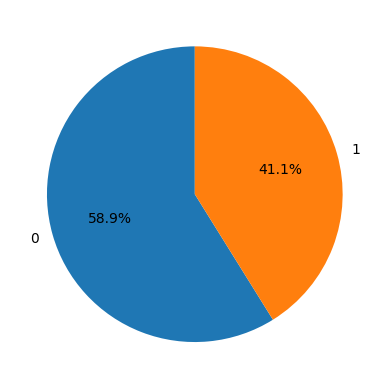

In [ ]:
counts = df['Survived'].value_counts()
plt.pie(counts.values,
        labels=counts.index,
        autopct='%1.1f%%', startangle=90)
plt.show

In [37]:
px.pie(df, names='Survived',
            title='<b>Survival Distribution</b>',
            color_discrete_sequence=px.colors.qualitative.Pastel,
            hole=0.4)

In [ ]:
def plot_survival_pie(df):
    fig = px.pie(df, names='Survived',
            title='<b>Survival Distribution</b>',
            color_discrete_sequence=px.colors.qualitative.Pastel,
            hole=0.4)
    fig.show()

plot_survival_pie(df)

In [ ]:
px.pie(df, names='Survived',
            title='<b>Survival Distribution</b>',
            color_discrete_map={0:'blue', 1:'red'},
            category_orders={'Survived':[0,1]},
            hole=0.4)

In [ ]:
fig = px.pie(df, names='Survived',
            title='<b>Survival Distribution</b>',
            color_discrete_sequence=px.colors.qualitative.Pastel,
            hole=0.4)
fig.update_layout(annotations = [dict(text = 'Survived', font_size = 20, x= 0.5, y=0.5, showarrow=False)])
fig.show()


In [ ]:
fig = px.histogram(df, x='Survived', color = 'Sex',
            title='<b>Survival based on Gender</b>',
            barmode='group')
fig.update_layout(width = 500, height=400, bargap = 0.4)
fig.show()

In [ ]:
import plotly.subplots as sp
import plotly.graph_objects as go

fig = sp.make_subplots(rows=1, cols=2, subplot_titles=num_cols)
for i, col in enumerate(num_cols):
    fig.add_trace(
        go.Histogram(x=df[col], name=col, marker=dict(line=dict(color='black', width=1))),
        row=1, col=i+1
    )

fig.show()    

In [ ]:
cat_cols = df.select_dtypes('category').columns
cat_cols

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='str')

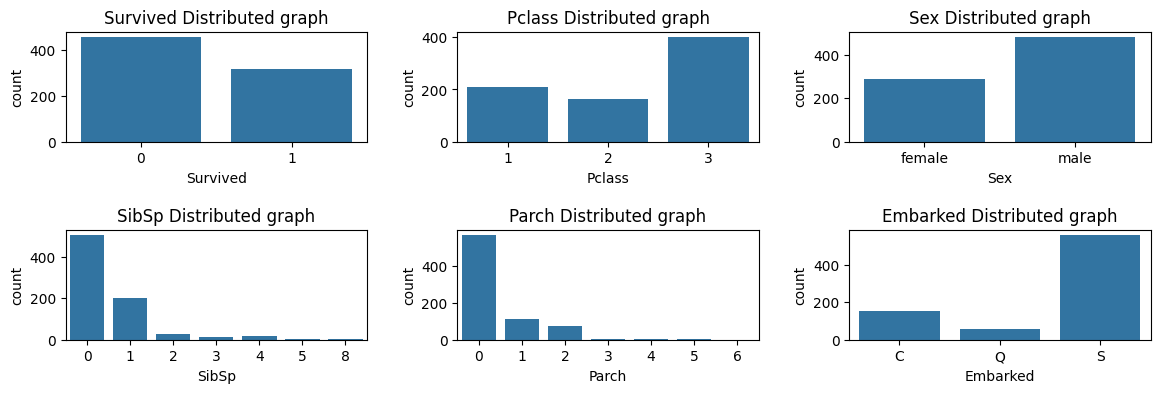

In [ ]:
plt.figure(figsize=(14, 4))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = col, data=df)
    plt.title(f"{col} Distributed graph")

plt.subplots_adjust(hspace=0.8, wspace=0.3)
plt.show()

In [ ]:
unique = df['Survived'].value_counts()
print(unique)
count = unique.values
categories = unique.index
categories

Survived
0    455
1    318
Name: count, dtype: int64


CategoricalIndex([0, 1], categories=[0, 1], ordered=False, dtype='category', name='Survived')

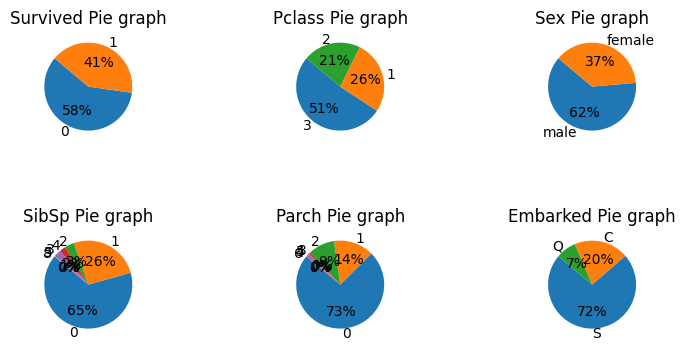

In [ ]:
plt.figure(figsize=(9, 4))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 3, i+1) 
    unique = df[col].value_counts()
    count = unique.values
    categories = unique.index
    plt.pie(count, labels=categories, startangle = 140, autopct = '%1.1d%%' )
    plt.title(f"{col} Pie graph")

plt.subplots_adjust(hspace=0.8, wspace=0.3)
plt.show()    

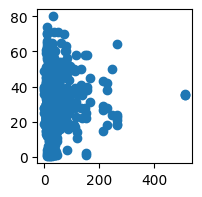

In [ ]:
plt.figure(figsize=(2, 2))
plt.scatter(df['Fare'], df['Age'])

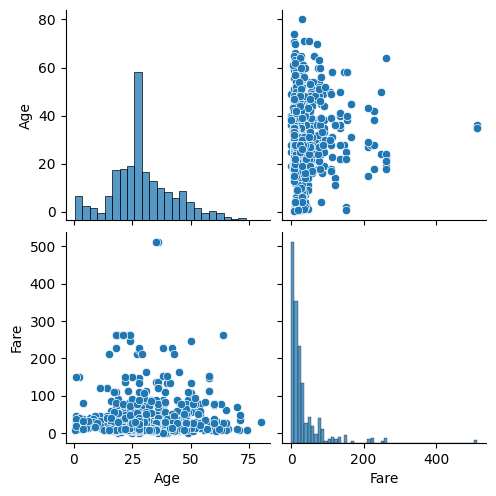

In [ ]:
sns.pairplot(df)
# variance and covarience(correlation)

In [ ]:
corr = df[['Age', 'Fare']].corr()
#core = df.select_dtypes(include='number').corr()
corr 

,Age,Fare
Age,1.000000,0.089624
Fare,0.089624,1.000000


In [ ]:
agg = df.pivot_table(index='Survived',columns = 'Sex', values=['Age'], aggfunc=len)
agg

Age     
Sex      female male
Survived            
0            76  379
1           214  104

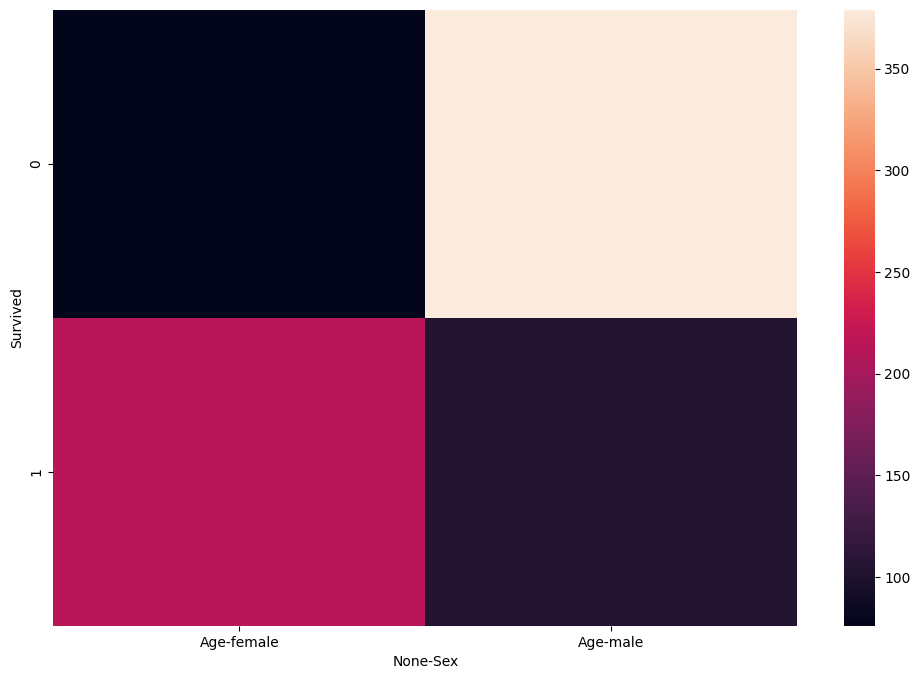

In [ ]:
plt.figure(figsize=(12, 8))
agg = df.pivot_table(index='Survived',columns = 'Sex', values=['Age'], aggfunc=len)
sns.heatmap(agg)
plt.show()

In [ ]:
x = df.drop('Survived', axis=1)
y = df['Survived']

In [ ]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
885,3,female,39.0,0,5,29.1250,Q
887,1,female,19.0,0,0,30.0000,S
888,3,female,28.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [ ]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 773, dtype: category
Categories (2, int64): [0, 1]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
num_cols = x.select_dtypes('number').columns
scaler = MinMaxScaler()
scaler.fit(x[num_cols])
x[num_cols] = scaler.transform(x[num_cols])

In [ ]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,0.271174,1,0,0.014151,S
1,1,female,0.472229,1,0,0.139136,C
2,3,female,0.321438,0,0,0.015469,S
3,1,female,0.434531,1,0,0.103644,S
4,3,male,0.434531,0,0,0.015713,S
...,...,...,...,...,...,...,...
885,3,female,0.484795,0,5,0.056848,Q
887,1,female,0.233476,0,0,0.058556,S
888,3,female,0.346569,1,2,0.045771,S
889,1,male,0.321438,0,0,0.058556,C


In [ ]:
str_cols = ['Sex', 'Embarked']

In [ ]:
from category_encoders import OneHotEncoder
encoder = OneHotEncoder(cols = str_cols, drop_invariant=True) 
x = encoder.fit_transform(x)
x

,Pclass,Sex_1,Sex_2,Age,SibSp,Parch,Fare,Embarked_1,Embarked_2,Embarked_3
0,3,1,0,0.271174,1,0,0.014151,1,0,0
1,1,0,1,0.472229,1,0,0.139136,0,1,0
2,3,0,1,0.321438,0,0,0.015469,1,0,0
3,1,0,1,0.434531,1,0,0.103644,1,0,0
4,3,1,0,0.434531,0,0,0.015713,1,0,0
...,...,...,...,...,...,...,...,...,...,...
885,3,0,1,0.484795,0,5,0.056848,0,0,1
887,1,0,1,0.233476,0,0,0.058556,1,0,0
888,3,0,1,0.346569,1,2,0.045771,1,0,0
889,1,1,0,0.321438,0,0,0.058556,0,1,0


In [36]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
class person:
    def __init__(self, name, age):
        self.name = name
        self.age = age
    
    @property
    def get_info(self):
        return f"Name: {self.name}, Age: {self.age}"    

In [ ]:
p = person("Samuel", 20)
p.get_info

<bound method person.get_info of <__main__.person object at 0x00000244FEB00950>>